In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv('Coursera.csv')

In [20]:
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [21]:
data.shape

(3522, 7)

In [22]:
data.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [23]:
data.duplicated().sum()

98

In [24]:
data.drop_duplicates(inplace=True)

In [25]:
data['Course Description'].value_counts()

This specialization offers the latest developments in blockchain technology through a highly engaging learning experience with animated video components and intuitive course flow to maximize your knowledge retention.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [26]:
data['Course Name'].value_counts()

Corporate Strategy                                        2
Introduction to Psychology                                2
Cryptography                                              2
Portfolio and Risk Management                             2
Python Data Structures                                    2
                                                         ..
Symmetric Cryptography                                    1
Using Descriptive Statistics to Analyze Data in R         1
BIM Fundamentals for Engineers                            1
Organizational Behavior: How to Manage People             1
Architecting with Google Kubernetes Engine: Production    1
Name: Course Name, Length: 3416, dtype: int64

In [27]:
data['Difficulty Level'].value_counts()

Beginner          1406
Advanced           991
Intermediate       823
Conversant         154
Not Calibrated      50
Name: Difficulty Level, dtype: int64

In [28]:
data['Course Rating'].value_counts()

4.7               707
4.6               602
4.8               585
4.5               380
4.4               235
4.9               174
4.3               159
4.2               120
5                  89
4.1                85
Not Calibrated     82
4                  50
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [29]:
data = data[data['Course Rating'] != 'Not Calibrated']
data['Course Rating'].value_counts()

4.7    707
4.6    602
4.8    585
4.5    380
4.4    235
4.9    174
4.3    159
4.2    120
5       89
4.1     85
4       50
3.8     24
3.9     20
3.7     18
3.6     18
3.5     17
3.4     13
3       12
3.2      9
3.3      6
2.9      6
2.6      2
2.8      2
2.4      2
1        2
2        1
3.1      1
2.5      1
1.9      1
2.3      1
Name: Course Rating, dtype: int64

In [30]:
data = data[data['Difficulty Level'] != 'Not Calibrated']
data['Difficulty Level'].value_counts()

Beginner        1387
Advanced         955
Intermediate     809
Conversant       143
Name: Difficulty Level, dtype: int64

In [31]:
import re
data = data[data['Course Rating']!='Not Calibrated']
data['Course Rating'] = data['Course Rating'].apply(lambda x: float(re.findall(r'\d+\.\d+', str(x))[0]) if re.findall(r'\d+\.\d+', str(x)) else 0.0)
data['Course Rating'].value_counts()

4.7    696
4.6    588
4.8    579
4.5    377
4.4    231
4.9    172
4.3    153
0.0    153
4.2    119
4.1     85
3.8     24
3.9     20
3.6     18
3.7     18
3.5     17
3.4     13
3.2      9
3.3      6
2.9      6
2.6      2
2.8      2
2.4      2
3.1      1
2.5      1
1.9      1
2.3      1
Name: Course Rating, dtype: int64

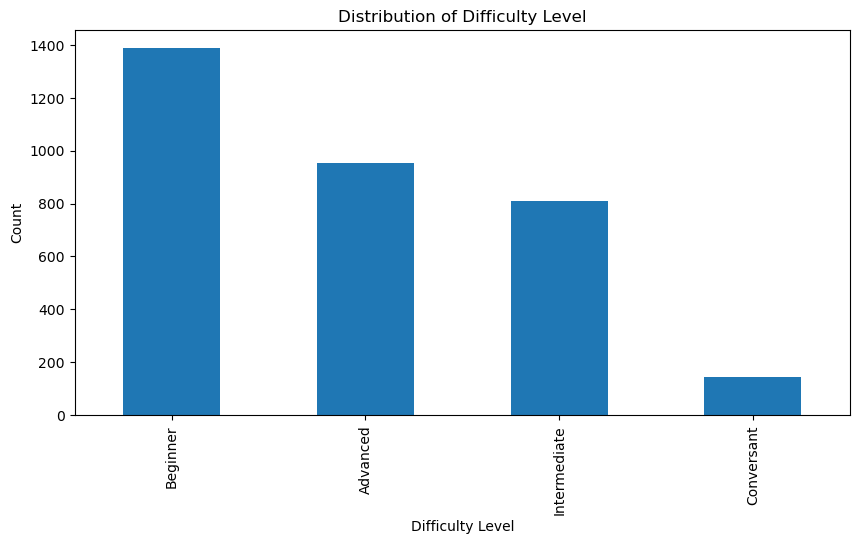

In [32]:
# Plotting the distribution of difficulty level
plt.figure(figsize=(10,5))
plt.title('Distribution of Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
data['Difficulty Level'].value_counts().plot(kind='bar')
plt.show()

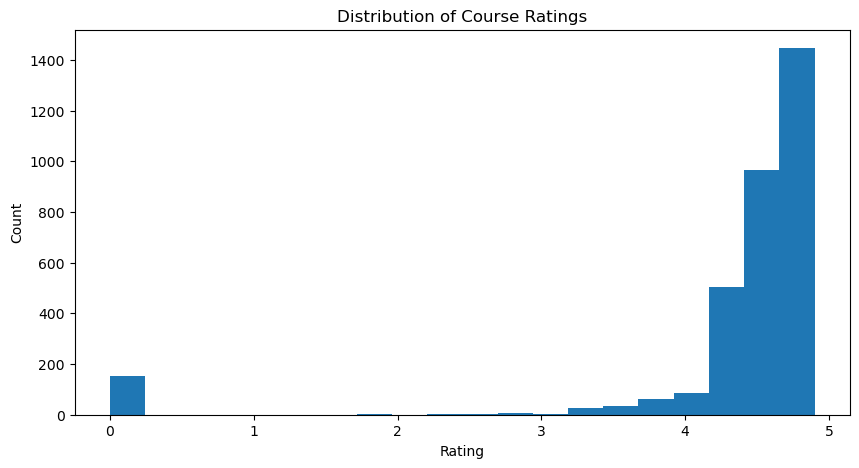

In [33]:
plt.figure(figsize=(10,5))
plt.hist(data['Course Rating'],bins=20)
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [36]:
# TF-IDF Vectorization with bi-grams
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
features = tfidf.fit_transform(data['Course Description'] + data['Course Name'] + data['Skills'])


In [37]:
features = tfidf.fit_transform(data['Course Description']+data['Course Name']+data['Skills'])

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_courses(user_input):
    # Preprocess user input
    preprocessed_input = tfidf.transform([user_input])

    # Calculate cosine similarity
    similarity_scores = cosine_similarity(preprocessed_input, features)

    # Get indices of top recommended courses
    top_indices = similarity_scores.argsort()[0][::-1][:5]

    # Get recommended courses
    recommended_courses = data.iloc[top_indices][['Course Name','Course Description','Difficulty Level','Course Rating','Skills']]

    return pd.DataFrame(recommended_courses)


In [39]:
user = input('Enter your course description, name or skills: ')
rec = recommend_courses(user)
rec.head()

,Course Name,Course Description,Difficulty Level,Course Rating,Skills
2746,What is Data Science?,The art of uncovering the insights and trends ...,Conversant,4.6,analysis Machine Learning Data Mining Artif...
2355,A Crash Course in Data Science,By now you have definitely heard about data sc...,Conversant,4.4,analysis Machine Learning software Human Le...
329,Building a Data Science Team,Data science is a team sport. As a data scienc...,Intermediate,4.5,Data Analysis team management Team Building ...
2214,Data Science for Business Innovation,The course is a compendium of the must-have ex...,Advanced,4.2,statistical classification Machine Learning ...
1209,Code Free Data Science,The Code Free Data Science class is designed f...,Beginner,4.3,analytics knime download decision tree Mac...
